In [35]:
#1. Perform the following operations using Python on a data set : read data
#from different formats(like csv, xls),indexing and selecting data, sort data,
#describe attributes of data, checking data types of each column. (Use
#Titanic Dataset).

# Step 1: Import Libraries
import pandas as pd

# Step 2: Read Data from Different Formats
# Read from CSV file
titanic_csv = pd.read_csv("D:/TY SEM-1/DSML/Titanic.csv")  
print("Data loaded from CSV:", titanic_csv.head())

# If you have an Excel file (example)
# titanic_excel = pd.read_excel("titanic.xlsx")
# print(titanic_excel.head())

# Step 3: Indexing and Selecting Data
print("\nSelecting specific columns:")
print(titanic_csv[['Name', 'Survived', 'Sex', 'Age']].head())

print("\nSelecting specific rows (1 to 5):")
print(titanic_csv.iloc[1:6])

# Step 4: Sorting Data (based on Age)
sorted_data = titanic_csv.sort_values(by='Age')
print("\nData sorted by Age:\n", sorted_data[['Name', 'Age']].head())

# Step 5: Describe Attributes of Data (Statistics)
print("\nSummary Statistics of Numerical Columns:\n")
print(titanic_csv.describe())

# Step 6: Checking Data Types of Each Column
print("\nData Types of Each Column:\n")
print(titanic_csv.dtypes)

Data loaded from CSV:    PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Selecting specific columns:
                                   

In [3]:

#2. Perform the following operations using Python on the Telecom_Churn
#dataset. Compute and display summary statistics for each feature available
#in the dataset using separate commands for each statistic. (e.g. minimum
#value, maximum value, mean, range, standard deviation, variance and
#percentiles).


import pandas as pd



# Load dataset
telecom = pd.read_csv(r"D:/TY SEM-1/DSML/Telecom Churn.csv")

print("Dataset Loaded Successfully\n")

# Select only numeric columns
numeric_cols = telecom.select_dtypes(include=['int64', 'float64'])

# Minimum
print("\n🔹 Minimum Values:\n")
print(numeric_cols.min())

# Maximum
print("\n🔹 Maximum Values:\n")
print(numeric_cols.max())

# Mean
print("\n🔹 Mean Values:\n")
print(numeric_cols.mean())

# Range = Max - Min
range_values = numeric_cols.max() - numeric_cols.min()
print("\n🔹 Range Values:\n")
print(range_values)

# Standard Deviation
print("\n🔹 Standard Deviation:\n")
print(numeric_cols.std())

# Variance
print("\n🔹 Variance:\n")
print(numeric_cols.var())

# Percentiles
print("\n🔹 Percentiles (25%, 50%, 75%):\n")
print(numeric_cols.quantile([0.25, 0.50, 0.75]))



Dataset Loaded Successfully


🔹 Minimum Values:

account length              1.00
area code                 408.00
number vmail messages       0.00
total day minutes           0.00
total day calls             0.00
total day charge            0.00
total eve minutes           0.00
total eve calls             0.00
total eve charge            0.00
total night minutes        23.20
total night calls          33.00
total night charge          1.04
total intl minutes          0.00
total intl calls            0.00
total intl charge           0.00
customer service calls      0.00
dtype: float64

🔹 Maximum Values:

account length            243.00
area code                 510.00
number vmail messages      51.00
total day minutes         350.80
total day calls           165.00
total day charge           59.64
total eve minutes         363.70
total eve calls           170.00
total eve charge           30.91
total night minutes       395.00
total night calls         175.00
total night charge       

Dataset Loaded Successfully


🔹 Standard Deviation:

Unnamed: 0                7261.767347
NumberFloorsofBuilding       6.952397
dtype: float64

🔹 Variance:

Unnamed: 0                5.273326e+07
NumberFloorsofBuilding    4.833582e+01
dtype: float64

🔹 Percentiles (25%, 50%, 75%):

      Unnamed: 0  NumberFloorsofBuilding
0.25      6288.5                     4.0
0.50     12577.0                     5.0
0.75     18865.5                     8.0


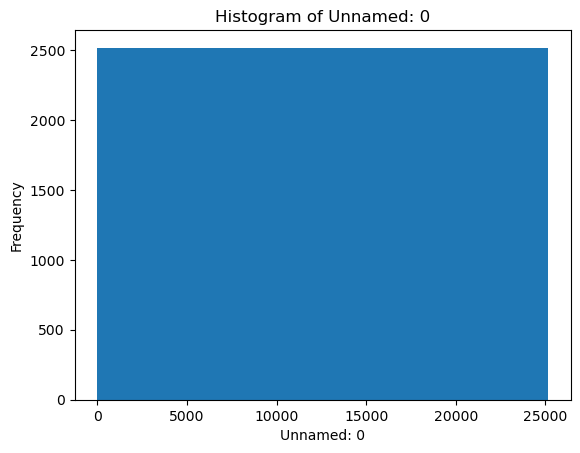

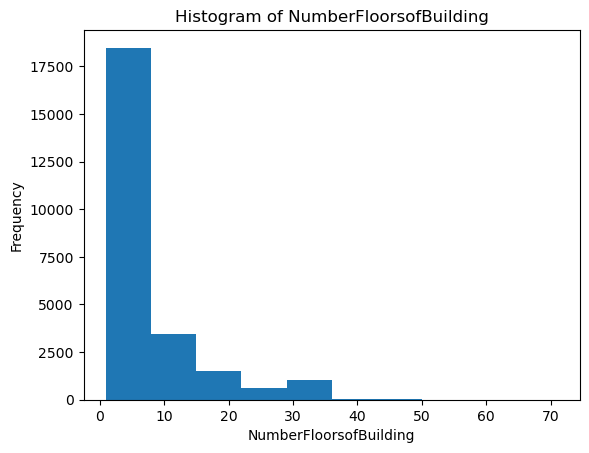

In [5]:
#3. Perform the following operations using Python on the data set
#House_Price Prediction dataset. Compute standard deviation, variance and
#percentiles using separate commands, for each feature. Create a histogram
#for each feature in the dataset to illustrate the feature distributions.

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
house = pd.read_csv(r"D:\TY SEM-1\DSML\House Data.csv")
print("Dataset Loaded Successfully\n")



# Standard deviation
print("\n🔹 Standard Deviation:\n")
print(house.std(numeric_only=True))

# Variance
print("\n🔹 Variance:\n")
print(house.var(numeric_only=True))

# Percentiles (Numeric columns only)
print("\n🔹 Percentiles (25%, 50%, 75%):\n")
numeric_cols = house.select_dtypes(include=['int64', 'float64'])
print(numeric_cols.quantile([0.25, 0.50, 0.75]))

# Histograms for numeric features
for col in numeric_cols.columns:
    plt.figure()
    plt.hist(house[col].dropna())
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [15]:
#4. Write a program to do: A dataset collected in a cosmetics shop showing
#details of customers and whether or not they responded to a special offer
#to buy a new lip-stick is shown in table below. (Implement step by step
#using commands - Dont use library) Use this dataset to build a decision
#tree, with Buys as the target variable, to help in buying lipsticks in the
#future. Find the root node of the decision tree.
import pandas as pd
import math

# Load dataset
df = pd.read_csv(r"D:\TY SEM-1\DSML\Lipstick.csv")

target = "Buys"
attributes = ["Age", "Income", "Gender", "Ms"]

# Calculate Gini Index
def gini(data):
    total = len(data)
    if total == 0: return 0
    yes = len(data[data[target] == "Yes"])
    no = len(data[data[target] == "No"])
    p_yes = yes / total
    p_no = no / total
    return 1 - (p_yes**2 + p_no**2)

# Calculate Gini Gain for an attribute
def gini_gain(data, attribute):
    total = len(data)
    weighted_gini = 0
    for value in data[attribute].unique():
        subset = data[data[attribute] == value]
        weighted_gini += (len(subset)/total) * gini(subset)
    return gini(data) - weighted_gini

# Compute Gini Gain for each attribute
gains = {attr: gini_gain(df, attr) for attr in attributes}

# Display Gains
print("\nGini Gain Values:")
for a, g in gains.items():
    print(f"{a}: {g:.4f}")

# Find ROOT NODE
root = max(gains, key=gains.get)
print("\n===============================")
print(" ROOT NODE OF DECISION TREE →", root)
print("===============================")



Gini Gain Values:
Age: 0.1163
Income: 0.0187
Gender: 0.0918
Ms: 0.0102

 ROOT NODE OF DECISION TREE → Age


In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv(r"D:\TY SEM-1\DSML\Lipstick.csv")

# Input (features) and Output (target)
X = df[['Age', 'Income', 'Gender', 'Ms']].copy()
y = df['Buys']

# Label Encoding for categorical data
le = LabelEncoder()
for col in X.columns:
    X[col] = le.fit_transform(X[col])
y = LabelEncoder().fit_transform(y)

# Train Decision Tree
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X, y)

# Test data for prediction
test = pd.DataFrame({
    'Age': ['>35'],
    'Income': ['Medium'],
    'Gender': ['Female'],
    'Ms': ['Married']
})

# Encode test data
for col in test.columns:
    test[col] = LabelEncoder().fit_transform(test[col])

# Predict
prediction = model.predict(test)
result = "Yes" if prediction[0] == 1 else "No"
print("Final Decision:", result)


Final Decision: Yes


In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv(r"D:\TY SEM-1\DSML\Lipstick.csv")

# Input features & target
X = df[['Age', 'Income', 'Gender', 'Ms']].copy()
y = df['Buys']

# Label encoders dictionary
encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le     # save encoder for each column

target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

# Train Model
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X, y)

# Test sample
test = pd.DataFrame({
    'Age': ['21-35'],
    'Income': ['Low'],
    'Gender': ['Male'],
    'Ms': ['Married']
})

# Apply SAME encoders used in training
for col in test.columns:
    test[col] = encoders[col].transform(test[col])

# Predict
prediction = model.predict(test)
result = target_encoder.inverse_transform(prediction)
print("Final Decision:", result[0])


Final Decision: Yes


In [31]:
import math

points = {
    "P1":[0.1,0.6],"P2":[0.15,0.71],"P3":[0.08,0.9],"P4":[0.16,0.85],
    "P5":[0.2,0.3],"P6":[0.25,0.5],"P7":[0.24,0.1],"P8":[0.3,0.2]
}

m1 = points["P1"]  # centroid C1
m2 = points["P8"]  # centroid C2

C1 = []
C2 = []

def distance(p, q):
    return math.sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2)

for key, value in points.items():
    d1 = distance(value, m1)
    d2 = distance(value, m2)
    if d1 < d2:
        C1.append(key)
    else:
        C2.append(key)

print("Cluster C1:", C1)
print("Cluster C2:", C2)

# Compute new centroids
def new_centroid(cluster):
    x = sum(points[i][0] for i in cluster) / len(cluster)
    y = sum(points[i][1] for i in cluster) / len(cluster)
    return [x,y]

m1_new = new_centroid(C1)
m2_new = new_centroid(C2)

print("Updated m1:", m1_new)
print("Updated m2:", m2_new)


Cluster C1: ['P1', 'P2', 'P3', 'P4', 'P6']
Cluster C2: ['P5', 'P7', 'P8']
Updated m1: [0.148, 0.712]
Updated m2: [0.24666666666666667, 0.19999999999999998]


In [33]:
import math

points = {
    "P1":[2,10],"P2":[2,5],"P3":[8,4],"P4":[5,8],
    "P5":[7,5],"P6":[6,4],"P7":[1,2],"P8":[4,9]
}

m1 = points["P1"]
m2 = points["P4"]
m3 = points["P7"]

C1 = []
C2 = []
C3 = []

def distance(p, q):
    return math.sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2)

for key, value in points.items():
    d1 = distance(value, m1)
    d2 = distance(value, m2)
    d3 = distance(value, m3)
    cluster = min([d1, d2, d3])
    if cluster == d1:
        C1.append(key)
    elif cluster == d2:
        C2.append(key)
    else:
        C3.append(key)

print("Cluster C1:", C1)
print("Cluster C2:", C2)
print("Cluster C3:", C3)

def new_centroid(cluster):
    x = sum(points[i][0] for i in cluster) / len(cluster)
    y = sum(points[i][1] for i in cluster) / len(cluster)
    return [x, y]

m1_new = new_centroid(C1)
m2_new = new_centroid(C2)
m3_new = new_centroid(C3)

print("Updated m1:", m1_new)
print("Updated m2:", m2_new)
print("Updated m3:", m3_new)


Cluster C1: ['P1']
Cluster C2: ['P3', 'P4', 'P5', 'P6', 'P8']
Cluster C3: ['P2', 'P7']
Updated m1: [2.0, 10.0]
Updated m2: [6.0, 6.0]
Updated m3: [1.5, 3.5]


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Feature Types:
sepal_length : Numeric
sepal_width  : Numeric
petal_length : Numeric
petal_width  : Numeric
species      : Nominal


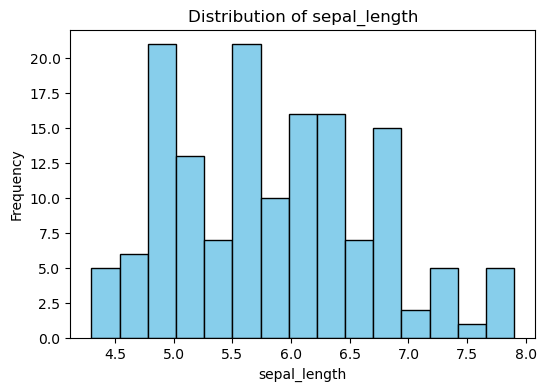

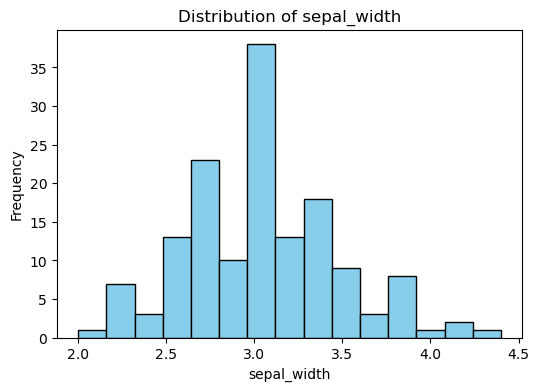

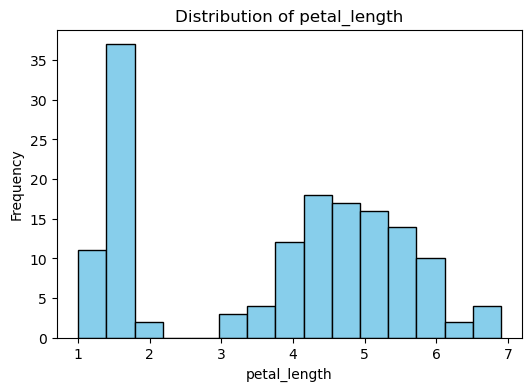

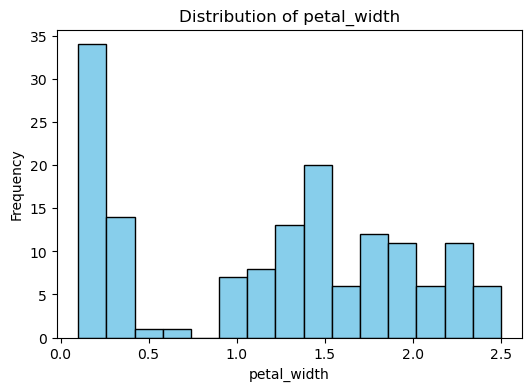

In [19]:
# Qno11: Use Iris flower dataset and perform following :
# 1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
# 2. Create a histogram for each feature in the dataset to illustrate the feature distributions.

# Step 1: Import necessary libraries
import pandas as pd        # For handling dataset
import matplotlib.pyplot as plt  # For plotting histograms

# Step 2: Load the dataset (replace with your file path if needed)
df = pd.read_csv(r"D:\TY SEM-1\DSML\IRIS.csv")

# Step 3: Display the first few rows to confirm data is loaded
print(df.head())

# Step 4: List features and their types
print("\nFeature Types:")
print("sepal_length : Numeric")
print("sepal_width  : Numeric")
print("petal_length : Numeric")
print("petal_width  : Numeric")
print("species      : Nominal")

# Step 5: Create histograms for each numeric feature
numeric_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Loop through each numeric feature and plot histogram
for feature in numeric_features:
    plt.figure(figsize=(6,4))        # Set figure size
    plt.hist(df[feature], bins=15, color='skyblue', edgecolor='black')  # Histogram
    plt.title(f"Distribution of {feature}")   # Title of plot
    plt.xlabel(feature)              # X-axis label
    plt.ylabel("Frequency")          # Y-axis label
    plt.show()                       # Display the plot

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


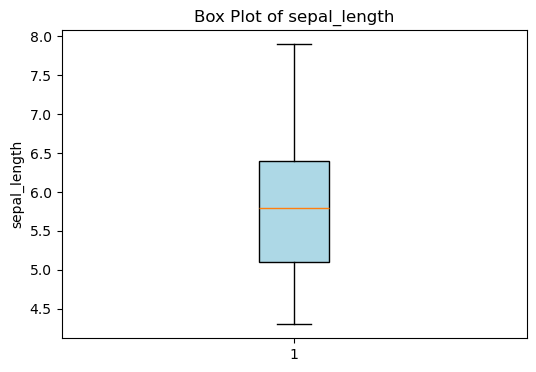

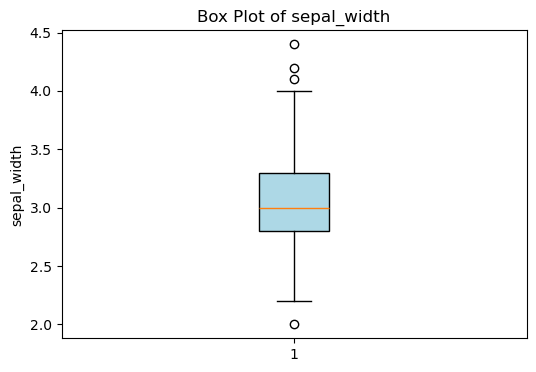

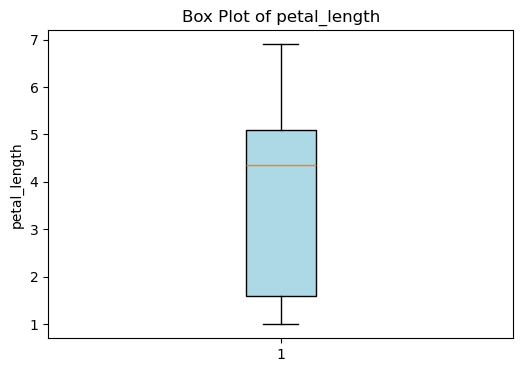

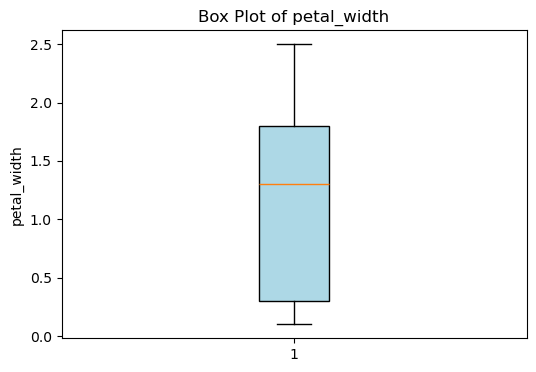

In [21]:
# Qno12: Use Iris flower dataset and perform following :
# 1. Create a box plot for each feature in the dataset.
# 2. Identify and discuss distributions and identify outliers from them.

# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
df = pd.read_csv(r"D:\TY SEM-1\DSML\IRIS.csv")

# Step 3: Display the first few rows to confirm data is loaded
print(df.head())

# Step 4: Create box plots for each numeric feature
numeric_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for feature in numeric_features:
    plt.figure(figsize=(6,4))               # Set figure size
    plt.boxplot(df[feature], patch_artist=True, boxprops=dict(facecolor='lightblue'))  
    plt.title(f"Box Plot of {feature}")     # Title
    plt.ylabel(feature)                     # Y-axis label
    plt.show()

In [39]:
# Qno13: Use the covid_vaccine_statewise.csv dataset and perform the following analytics:
# a. Describe the dataset
# b. Number of persons state wise vaccinated for first dose in India
# c. Number of persons state wise vaccinated for second dose in India

# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv(r"D:\TY SEM-1\DSML\Covid19 India.csv")
df.columns = df.columns.str.strip()   # remove hidden spaces

# Step 2: Describe dataset
print("\nDataset Info:")
print(df.info())
print("\nSummary Stats:")
print(df.describe())

# Step 3: Remove India total row (keep only states/UTs)
df_states = df[df['State'] != 'India']

# Step 4: State-wise First Dose
first_dose = df_states.groupby('State')['First Dose Administered'].max()
print("\nState-wise First Dose Vaccinations:")
print(first_dose)

# Step 5: State-wise Second Dose
second_dose = df_states.groupby('State')['Second Dose Administered'].max()
print("\nState-wise Second Dose Vaccinations:")
print(second_dose)




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB
None

Summary Stats:
                Sno         Cured         Deaths     Confirmed
count  18110.000000  1.811000e+04   18110.000000  1.811000e+04
mean    9055.500000  2.786375e+05    4052.402264  3.010314e+05
std     5228.051023  6.

KeyError: 'State'

In [41]:
# Qno14: Use the covid_vaccine_statewise.csv dataset and perform the following analytics:
# A. Describe the dataset
# B. Number of Males vaccinated
# C. Number of Females vaccinated

import pandas as pd

# Step 1: Load dataset
df = pd.read_csv(r"D:\TY SEM-1\DSML\Covid19 India.csv")
df.columns = df.columns.str.strip()   # clean column names

# Step 2: A. Describe the dataset
print("\nDataset Info:")
print(df.info())
print("\nSummary Stats:")
print(df.describe())
print("\nFirst 5 Rows:")
print(df.head())

# Step 3: Remove India total row (keep only states/UTs)
df_states = df[df['State'] != 'India']

# Step 4: B. Number of Males vaccinated (latest record per state)
males_vaccinated = df_states.groupby('State')['Male(Individuals Vaccinated)'].max()
print("\nState-wise Males Vaccinated:")
print(males_vaccinated)

# Step 5: C. Number of Females vaccinated (latest record per state)
females_vaccinated = df_states.groupby('State')['Female(Individuals Vaccinated)'].max()
print("\nState-wise Females Vaccinated:")
print(females_vaccinated)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB
None

Summary Stats:
                Sno         Cured         Deaths     Confirmed
count  18110.000000  1.811000e+04   18110.000000  1.811000e+04
mean    9055.500000  2.786375e+05    4052.402264  3.010314e+05
std     5228.051023  6.

KeyError: 'State'

Dataset Shape: (418, 12)
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


C:\Users\akash kotwal\AppData\Local\Temp\ipykernel_20264\949918490.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Set2")


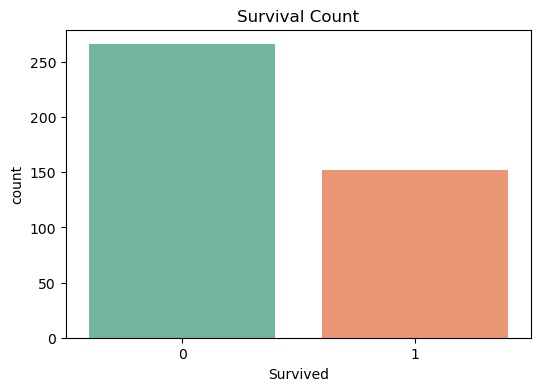

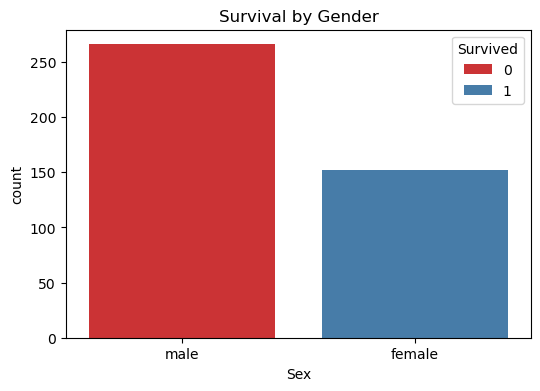

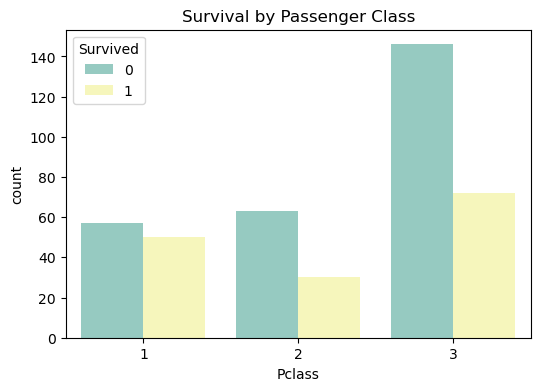

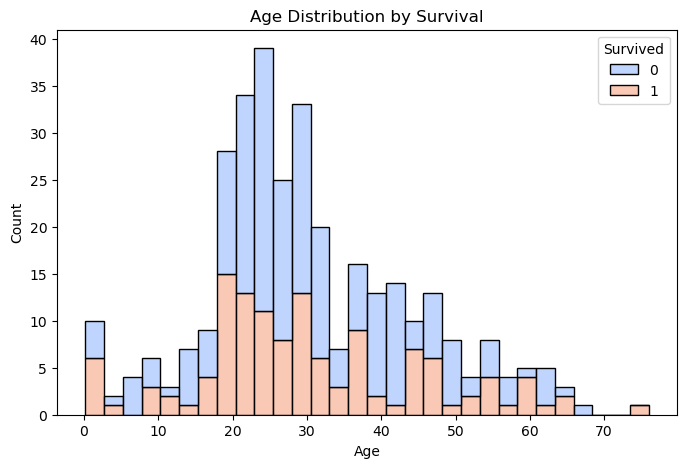

C:\Users\akash kotwal\AppData\Local\Temp\ipykernel_20264\949918490.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=df, palette="pastel")


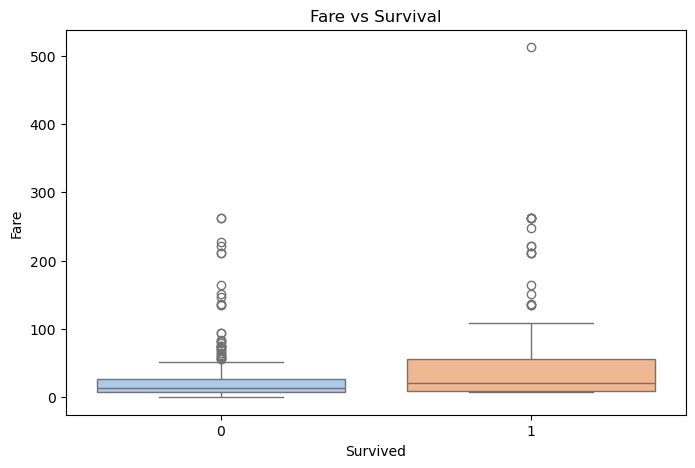

In [45]:
# Qno15: Titanic Dataset Analytics using Seaborn
# The dataset contains 891 rows with passenger details.
# Goal: Use Seaborn to visualize and find patterns.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv(r"D:\TY SEM-1\DSML\Titanic.csv")

# Step 2: Basic info
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)

# Step 3: Survival count plot
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Survival Count")
plt.show()

# Step 4: Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set1")
plt.title("Survival by Gender")
plt.show()

# Step 5: Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set3")
plt.title("Survival by Passenger Class")
plt.show()

# Step 6: Age distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=30, palette="coolwarm")
plt.title("Age Distribution by Survival")
plt.show()

# Step 7: Fare vs Survival
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Fare", data=df, palette="pastel")
plt.title("Fare vs Survival")
plt.show()

Dataset Shape: (891, 15)
Columns: Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


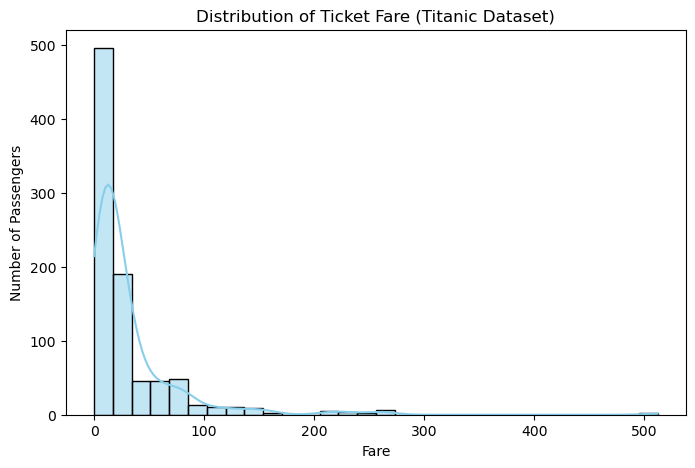

In [47]:
# Qno16: Use the inbuilt dataset 'titanic'. 
# The dataset contains 891 rows and contains information about the passengers 
# who boarded the unfortunate Titanic ship. 
# Write a code to check how the price of the ticket (column name: 'fare') 
# for each passenger is distributed by plotting a histogram.

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the inbuilt Titanic dataset from Seaborn
titanic = sns.load_dataset("titanic")

# Step 2: Check dataset shape and columns
print("Dataset Shape:", titanic.shape)
print("Columns:", titanic.columns)

# Step 3: Plot histogram of 'fare'
plt.figure(figsize=(8,5))
sns.histplot(titanic['fare'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Ticket Fare (Titanic Dataset)")
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.show()

In [49]:
# Qno17: Compute Accuracy, Error rate, Precision, Recall 
# Given confusion matrix values:
# True Positives (TP) = 1
# False Positives (FP) = 1
# False Negatives (FN) = 8
# True Negatives (TN) = 90

# Step 1: Assign values
TP = 1
FP = 1
FN = 8
TN = 90

# Step 2: Total samples
total = TP + FP + FN + TN

# Step 3: Compute metrics
accuracy = (TP + TN) / total
error_rate = (FP + FN) / total
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

# Step 4: Print results
print(f"Accuracy     : {accuracy:.2f} ({accuracy*100:.1f}%)")
print(f"Error Rate   : {error_rate:.2f} ({error_rate*100:.1f}%)")
print(f"Precision    : {precision:.2f} ({precision*100:.1f}%)")
print(f"Recall       : {recall:.2f} ({recall*100:.1f}%)")

Accuracy     : 0.91 (91.0%)
Error Rate   : 0.09 (9.0%)
Precision    : 0.50 (50.0%)
Recall       : 0.11 (11.1%)


In [60]:
# Qno19: Write a Python program to display some basic statistical details 
# like percentile, mean, standard deviation etc (Use python and pandas commands) 
# for the species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris-virginica’ 
# from iris.csv dataset.

import pandas as pd

# Step 1: Load dataset
df = pd.read_csv(r"D:\TY SEM-1\DSML\IRIS.csv")
df.columns = df.columns.str.strip()   # clean column names

# Step 2: Filter by species
species_list = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

for sp in species_list:
    print("\n==============================================")
    print(f"Statistical Summary for {sp}")
    print("==============================================")
    
    # Step 3: Select rows for the species
    df_species = df[df['species'] == sp]
    
    # Step 4: Display descriptive statistics
    print(df_species.describe(percentiles=[0.25, 0.5, 0.75]))


Statistical Summary for Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

Statistical Summary for Iris-versicolor
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000   

In [62]:
# Qno20: K-means clustering on IRIS dataset with K=3
# Euclidean distance, random initialization, 10 iterations

import pandas as pd
import numpy as np
import random

# Step 1: Load dataset
df = pd.read_csv(r"D:\TY SEM-1\DSML\IRIS.csv")
df.columns = df.columns.str.strip()

# Use only numeric columns for clustering
X = df.iloc[:, 0:4].values   # sepal_length, sepal_width, petal_length, petal_width

# Step 2: Initialize cluster means randomly from data points
k = 3
np.random.seed(42)   # for reproducibility
initial_indices = np.random.choice(len(X), k, replace=False)
means = X[initial_indices]

# Step 3: Iterate for 10 iterations
for _ in range(10):
    # Assign points to nearest mean
    clusters = [[] for _ in range(k)]
    for x in X:
        distances = [np.linalg.norm(x - mean) for mean in means]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(x)
    
    # Update means
    new_means = []
    for cluster in clusters:
        new_means.append(np.mean(cluster, axis=0))
    means = new_means

# Step 4: Print final cluster means
print("\nFinal Cluster Means for K=3:")
for i, mean in enumerate(means):
    print(f"Cluster {i+1} mean: {mean}")


Final Cluster Means for K=3:
Cluster 1 mean: [5.9016129  2.7483871  4.39354839 1.43387097]
Cluster 2 mean: [5.006 3.418 1.464 0.244]
Cluster 3 mean: [6.85       3.07368421 5.74210526 2.07105263]


In [64]:
# Qno21: K-means clustering on IRIS dataset with K=4
# Euclidean distance, random initialization, 10 iterations

import pandas as pd
import numpy as np

# Step 1: Load dataset
df = pd.read_csv(r"D:\TY SEM-1\DSML\IRIS.csv")
df.columns = df.columns.str.strip()

# Use only numeric columns for clustering
X = df.iloc[:, 0:4].values

# Step 2: Initialize cluster means randomly from data points
k = 4
np.random.seed(42)
initial_indices = np.random.choice(len(X), k, replace=False)
means = X[initial_indices]

# Step 3: Iterate for 10 iterations
for _ in range(10):
    clusters = [[] for _ in range(k)]
    for x in X:
        distances = [np.linalg.norm(x - mean) for mean in means]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(x)
    
    new_means = []
    for cluster in clusters:
        new_means.append(np.mean(cluster, axis=0))
    means = new_means

# Step 4: Print final cluster means
print("\nFinal Cluster Means for K=4:")
for i, mean in enumerate(means):
    print(f"Cluster {i+1} mean: {mean}")


Final Cluster Means for K=4:
Cluster 1 mean: [6.29361702 2.9        4.95106383 1.72978723]
Cluster 2 mean: [5.006 3.418 1.464 0.244]
Cluster 3 mean: [7.08695652 3.12608696 6.01304348 2.14347826]
Cluster 4 mean: [5.58       2.63333333 3.98666667 1.23333333]


In [66]:
# Qno22: Compute Accuracy, Error rate, Precision, Recall 
# Given confusion matrix:
# cancer=yes (TP=90, FN=210)
# cancer=no  (FP=140, TN=9560)
# Total = 10000

# Step 1: Assign values
TP = 90
FN = 210
FP = 140
TN = 9560

# Step 2: Total samples
total = TP + FN + FP + TN

# Step 3: Compute metrics
accuracy = (TP + TN) / total
error_rate = (FP + FN) / total
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

# Step 4: Print results
print(f"Accuracy     : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Error Rate   : {error_rate:.4f} ({error_rate*100:.2f}%)")
print(f"Precision    : {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall       : {recall:.4f} ({recall*100:.2f}%)")

Accuracy     : 0.9650 (96.50%)
Error Rate   : 0.0350 (3.50%)
Precision    : 0.3913 (39.13%)
Recall       : 0.3000 (30.00%)


In [72]:
# Qno24: Perform the following operations using Python on a suitable dataset:
# 1. Counting unique values of data
# 2. Format (data type) of each column
# 3. Converting variable data type (e.g., from long to short, vice versa)
# 4. Identifying missing values
# 5. Filling in the missing values

import pandas as pd
import numpy as np

# Step 1: Load dataset (your path)
df = pd.read_csv(r"D:\TY SEM-1\DSML\IRIS.csv")
df.columns = df.columns.str.strip()  # clean column names

# Step 2: Counting unique values of data
print("\nUnique values per column:")
print(df.nunique())

# Step 3: Format (data type) of each column
print("\nData types of each column:")
print(df.dtypes)

# Step 4: Converting variable data type (example: float -> int for sepal_length)
df['sepal_length'] = df['sepal_length'].astype(int)
print("\nData type after conversion of sepal_length:")
print(df['sepal_length'].dtypes)

# Step 5: Identifying missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 6: Filling in the missing values safely
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after filling:")
print(df.isnull().sum())


Unique values per column:
sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

Data types of each column:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Data type after conversion of sepal_length:
int32

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Missing values after filling:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [74]:
# Qno25: Perform Data Cleaning and Data Transformation using Python on a dataset

import pandas as pd
import numpy as np

# Step 1: Load dataset (your path)
df = pd.read_csv(r"D:\TY SEM-1\DSML\IRIS.csv")
df.columns = df.columns.str.strip()   # clean column names
#It removes spaces from left and right side of each column name.

print("\nOriginal Data:")
print(df.head())

# -------------------------------
# DATA CLEANING
# -------------------------------

# Step 2: Identify missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 3: Fill missing values safely
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Step 4: Remove duplicates
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)

# -------------------------------
# DATA TRANSFORMATION
# -------------------------------

# Step 5: Convert data types (example: float -> int for sepal_length)
df['sepal_length'] = df['sepal_length'].astype(int)

# Step 6: Create new derived column (Petal Area = petal_length * petal_width)
df['Petal_Area'] = df['petal_length'] * df['petal_width']

# Step 7: Normalize a column (scale sepal_width between 0 and 1)
df['sepal_width_norm'] = (df['sepal_width'] - df['sepal_width'].min()) / (df['sepal_width'].max() - df['sepal_width'].min())

print("\nTransformed Data:")
print(df.head())

# Step 8: Save cleaned & transformed dataset
df.to_csv(r"D:\TY SEM-1\DSML\IRIS_cleaned.csv", index=False)


Original Data:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Missing values after cleaning:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Shape after removing duplicates: (147, 5)

Transformed Data:
   sepal_length  sepal_width  petal_length  petal_width      species  \
0             5          3.5           1.4          0.2  Iris-setosa   
1             4          3.0           1.4          0.2  Iris-setosa   
2             4          3

In [76]:
# Qno23: Frequency Table and Information Gain for 'Age' attribute

import pandas as pd
import numpy as np

# Step 1: Create DataFrame from the given dataset
data = {
    'Age': ['Young','Young','Middle','Young','Middle','Old','Old','Old','Middle','Young',
            'Young','Middle','Middle','Middle','Old'],
    'Income': ['High','High','High','Medium','Low','Low','Low','Medium','Low','Medium',
               'Medium','Medium','High','Medium','Medium'],
    'Married': ['No','No','Yes','No','No','Yes','Yes','No','No','Yes',
                'Yes','Yes','Yes','Yes','Yes'],
    'Health': ['Fair','Fair','Fair','Fair','Good','Good','Good','Fair','Fair','Fair',
               'Good','Good','Good','Fair','Fair'],
    'Class': ['No','Yes','Yes','No','Yes','No','Yes','No','Yes','Yes',
              'Yes','Yes','Yes','No','No']
}
df = pd.DataFrame(data)

# Step 2: Frequency table for Age vs Class
#The crosstab function counts the frequency of combinations between two categorical variables.
print("\nFrequency Table (Age vs Class):")
freq_table = pd.crosstab(df['Age'], df['Class'])
print(freq_table)

# Step 3: Entropy function
#This calculates the probability of each unique value in the column
def entropy(col):
    probs = col.value_counts(normalize=True)
    return -np.sum(probs * np.log2(probs))

# Step 4: Information Gain function
def info_gain(data, split_attribute, target_attribute):
    total_entropy = entropy(data[target_attribute])
    values = data[split_attribute].unique()
    weighted_entropy = 0
    for v in values:
        subset = data[data[split_attribute] == v][target_attribute]
        weighted_entropy += (len(subset)/len(data)) * entropy(subset)
    return total_entropy - weighted_entropy

# Step 5: Compute Information Gain for Age
ig_age = info_gain(df, 'Age', 'Class')
print(f"\nInformation Gain for Age: {ig_age:.4f}")


Frequency Table (Age vs Class):
Class   No  Yes
Age            
Middle   1    5
Old      3    1
Young    2    3

Information Gain for Age: 0.1710
